In [7]:
#!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/fonts/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df = pd.read_csv('df_test.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(df.shape)
df.head(10)

(44796, 222)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,product,...,UC4CC1,UC4CCE,XC4CC1,XC4CC4,XC4CCE,XC4CCQ,XC4CCW,XCECC4,XCJCC3,XP9LI
0,0,2021-01-01 00:00:00.000,TCC43RQQZ3B,TKC4CJ,"[{""product"":""1ECZ"",""qty"":1},{""product"":""8CEC4Q...",1627000.0,0.0,0,online,"['1ECZ', '8CEC4Q']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-01-01 00:00:00.000,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online,"['4E4W', 'DC4CC4']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-01-01 00:00:00.000,TCC4RJ11QE7,TKC14E,"[{""product"":""IC4CC4"",""qty"":1}]",468000.0,0.0,0,online,['IC4CC4'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-01-01 00:00:00.000,TCC434QRCJY,TKC14R,"[{""product"":""5C4CC4"",""qty"":1}]",341000.0,0.0,0,online,['5C4CC4'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-01-01 00:00:00.000,TCC43RRCE10,TKC11Z,"[{""product"":""5C4C4Q"",""qty"":1}]",189000.0,0.0,0,online,['5C4C4Q'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-01-01 00:00:00.000,TCC4Q4ZC3JU,TKC1RW,"[{""product"":""BC4CC4"",""qty"":2},{""product"":""XC4C...",810000.0,0.0,0,online,"['BC4CC4', 'XC4CCE']",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,6,2021-01-01 00:00:00.000,TCC4WQQRE1I,T5CCQ4,"[{""product"":""5C4CC4"",""qty"":1}]",335000.0,0.0,0,online,['5C4CC4'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,2021-01-01 00:00:00.000,TCC4WC1JZJ2,T2CEQ1,"[{""product"":""5C4CC4"",""qty"":1}]",335000.0,0.0,0,online,['5C4CC4'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,2021-01-01 00:00:00.000,TCC4Q4ZZR1U,TUC1CJ,"[{""product"":""KC4C14"",""qty"":1}]",900000.0,0.0,0,online,['KC4C14'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,2021-01-01 00:00:00.000,TCC4W1QZCQU,TUC14W,"[{""product"":""5C4CC4"",""qty"":1}]",335000.0,0.0,0,online,['5C4CC4'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = df[df['product_json'].apply(lambda x: len(eval(x)) > 1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
print(df.shape)
df.head(10)

(8934, 222)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,product,...,UC4CC1,UC4CCE,XC4CC1,XC4CC4,XC4CCE,XC4CCQ,XC4CCW,XCECC4,XCJCC3,XP9LI
0,0,2021-01-01 00:00:00.000,TCC43RQQZ3B,TKC4CJ,"[{""product"":""1ECZ"",""qty"":1},{""product"":""8CEC4Q...",1627000.0,0.0,0,online,"['1ECZ', '8CEC4Q']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-01-01 00:00:00.000,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online,"['4E4W', 'DC4CC4']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-01-01 00:00:00.000,TCC4Q4ZC3JU,TKC1RW,"[{""product"":""BC4CC4"",""qty"":2},{""product"":""XC4C...",810000.0,0.0,0,online,"['BC4CC4', 'XC4CCE']",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,10,2021-01-01 00:00:00.000,TCC4114REEP,TYCCEE,"[{""product"":""KC4CC4"",""qty"":1},{""product"":""2CEC...",419000.0,0.0,0,online,"['KC4CC4', '2CECC4']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,11,2021-01-01 00:00:00.000,TCC4Q343ZQB,T7CERW,"[{""product"":""4E1J"",""qty"":1},{""product"":""IC4CC4...",580000.0,0.0,0,online,"['4E1J', 'IC4CC4']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,16,2021-01-01 00:00:00.000,TCC434WJER0,TSCEW1,"[{""product"":""8C4C4C"",""qty"":1},{""product"":""XC4C...",505000.0,0.0,0,online,"['8C4C4C', 'XC4CCE']",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24,24,2021-01-01 00:00:00.000,TCC434CJWJY,TDC1ZQ,"[{""product"":""4E1J"",""qty"":1},{""product"":""7C4CC4...",385000.0,0.0,0,online,"['4E1J', '7C4CC4']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,30,2021-01-01 00:00:00.000,TCC4QJEZCJK,TUC1CJ,"[{""product"":""BC4CCW"",""qty"":1},{""product"":""XC4C...",535000.0,0.0,0,online,"['BC4CCW', 'XC4CCE']",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31,31,2021-01-01 00:00:00.000,TCC4R1EWWZB,TUC14W,"[{""product"":""4E4W"",""qty"":1},{""product"":""BC4CCW...",278000.0,0.0,0,online,"['4E4W', 'BC4CCW', '8C4CC3']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,41,2021-01-01 00:00:00.000,TCC43RQJ3Q0,TDC1C1,"[{""product"":""1ECZ"",""qty"":1},{""product"":""0CECC4...",1636000.0,0.0,0,online,"['1ECZ', '0CECC4', '7CWCCR']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
prep = df.iloc[1:,2:].reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
print(prep)

              ent  center                                       product_json  \
0     TCC4Q4JZ4Q0  TKCEWQ  [{"product":"4E4W","qty":2},{"product":"DC4CC4...   
1     TCC4Q4ZC3JU  TKC1RW  [{"product":"BC4CC4","qty":2},{"product":"XC4C...   
2     TCC4114REEP  TYCCEE  [{"product":"KC4CC4","qty":1},{"product":"2CEC...   
3     TCC4Q343ZQB  T7CERW  [{"product":"4E1J","qty":1},{"product":"IC4CC4...   
4     TCC434WJER0  TSCEW1  [{"product":"8C4C4C","qty":1},{"product":"XC4C...   
...           ...     ...                                                ...   
8928  TCC4QZ13W3I  T8CCCR  [{"product":"8C4CC1","qty":2},{"product":"8C4C...   
8929  TCC43RECQE5  TDC1C1  [{"product":"5C4CC4","qty":1},{"product":"BC4C...   
8930  TCC4QJ1R3CP  TDC1ZW  [{"product":"44C4","qty":1},{"product":"5C4CC4...   
8931  TCC41E3EJ3Y  T6C4RC  [{"product":"4E41","qty":1},{"product":"5C4CC4...   
8932  TCC41CZQCJF  TKCC1C  [{"product":"XC4CC4","qty":1},{"product":"XC4C...   

      total_amount  discount  paid_amou

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
print(prep.shape)
prep.head(10)

(8933, 220)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,product,qty,0C4C4C,...,UC4CC1,UC4CCE,XC4CC1,XC4CC4,XC4CCE,XC4CCQ,XC4CCW,XCECC4,XCJCC3,XP9LI
0,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online,"['4E4W', 'DC4CC4']","[2, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCC4Q4ZC3JU,TKC1RW,"[{""product"":""BC4CC4"",""qty"":2},{""product"":""XC4C...",810000.0,0.0,0,online,"['BC4CC4', 'XC4CCE']","[2, 1]",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TCC4114REEP,TYCCEE,"[{""product"":""KC4CC4"",""qty"":1},{""product"":""2CEC...",419000.0,0.0,0,online,"['KC4CC4', '2CECC4']","[1, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCC4Q343ZQB,T7CERW,"[{""product"":""4E1J"",""qty"":1},{""product"":""IC4CC4...",580000.0,0.0,0,online,"['4E1J', 'IC4CC4']","[1, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCC434WJER0,TSCEW1,"[{""product"":""8C4C4C"",""qty"":1},{""product"":""XC4C...",505000.0,0.0,0,online,"['8C4C4C', 'XC4CCE']","[1, 1]",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,TCC434CJWJY,TDC1ZQ,"[{""product"":""4E1J"",""qty"":1},{""product"":""7C4CC4...",385000.0,0.0,0,online,"['4E1J', '7C4CC4']","[1, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TCC4QJEZCJK,TUC1CJ,"[{""product"":""BC4CCW"",""qty"":1},{""product"":""XC4C...",535000.0,0.0,0,online,"['BC4CCW', 'XC4CCE']","[1, 1]",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,TCC4R1EWWZB,TUC14W,"[{""product"":""4E4W"",""qty"":1},{""product"":""BC4CCW...",278000.0,0.0,0,online,"['4E4W', 'BC4CCW', '8C4CC3']","[1, 1, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TCC43RQJ3Q0,TDC1C1,"[{""product"":""1ECZ"",""qty"":1},{""product"":""0CECC4...",1636000.0,0.0,0,online,"['1ECZ', '0CECC4', '7CWCCR']","[1, 1, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,TCC43RQQWE2,TDC1ZQ,"[{""product"":""5C4CC4"",""qty"":1},{""product"":""BC4C...",510000.0,0.0,0,online,"['5C4CC4', 'BC4CC4']","[1, 1]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
prep2 = prep.drop(['center','product_json', 'total_amount','discount','paid_amount','trans_origin_type','product','qty'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print(prep2.shape)
prep2.head(10)

(8933, 212)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,0C4C4C,0C4CC1,0C4CC3,0C4CCJ,0C4CCQ,0C4CCZ,0CECC1,0CECC4,0CQCC4,...,UC4CC1,UC4CCE,XC4CC1,XC4CC4,XC4CCE,XC4CCQ,XC4CCW,XCECC4,XCJCC3,XP9LI
0,TCC4Q4JZ4Q0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCC4Q4ZC3JU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TCC4114REEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCC4Q343ZQB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCC434WJER0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,TCC434CJWJY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TCC4QJEZCJK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,TCC4R1EWWZB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TCC43RQJ3Q0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,TCC43RQQWE2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
prep2=prep2.set_index('ent')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
print(prep2.shape)
prep2.head(10)

(8933, 211)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0C4C4C,0C4CC1,0C4CC3,0C4CCJ,0C4CCQ,0C4CCZ,0CECC1,0CECC4,0CQCC4,1ECZ,...,UC4CC1,UC4CCE,XC4CC1,XC4CC4,XC4CCE,XC4CCQ,XC4CCW,XCECC4,XCJCC3,XP9LI
ent,,,,,,,,,,,,,,,,,,,,,
TCC4Q4JZ4Q0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCC4Q4ZC3JU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TCC4114REEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCC4Q343ZQB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCC434WJER0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TCC434CJWJY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCC4QJEZCJK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TCC4R1EWWZB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCC43RQJ3Q0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Group User
prep2 = prep2.groupby(['ent']).sum()

prep2[prep2 != 0] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
print(prep2.shape)
prep2.head(10)

(8189, 211)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0C4C4C,0C4CC1,0C4CC3,0C4CCJ,0C4CCQ,0C4CCZ,0CECC1,0CECC4,0CQCC4,1ECZ,...,UC4CC1,UC4CCE,XC4CC1,XC4CC4,XC4CCE,XC4CCQ,XC4CCW,XCECC4,XCJCC3,XP9LI
ent,,,,,,,,,,,,,,,,,,,,,
BCE1JRRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
T11RCEEI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T13WR3RK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
T14JZEQ7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1CCZRQF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1CE3RC5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
T1CJ1Q1U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1CJRZ37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
T1E113JI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


EDA

In [26]:
prep2.describe().T.sort_values('mean', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
5C4CC4,8189.0,0.460129,0.498438,0.0,0.0,0.0,1.0,1.0
7C4CC4,8189.0,0.182928,0.386631,0.0,0.0,0.0,0.0,1.0
XC4CCE,8189.0,0.164855,0.371073,0.0,0.0,0.0,0.0,1.0
BC4CC4,8189.0,0.163268,0.369632,0.0,0.0,0.0,0.0,1.0
8C4CC1,8189.0,0.150079,0.357171,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8C4C4J,8189.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8C4C4W,8189.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8C4C4Z,8189.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8C4CCW,8189.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Purchase/Usage Ranking

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


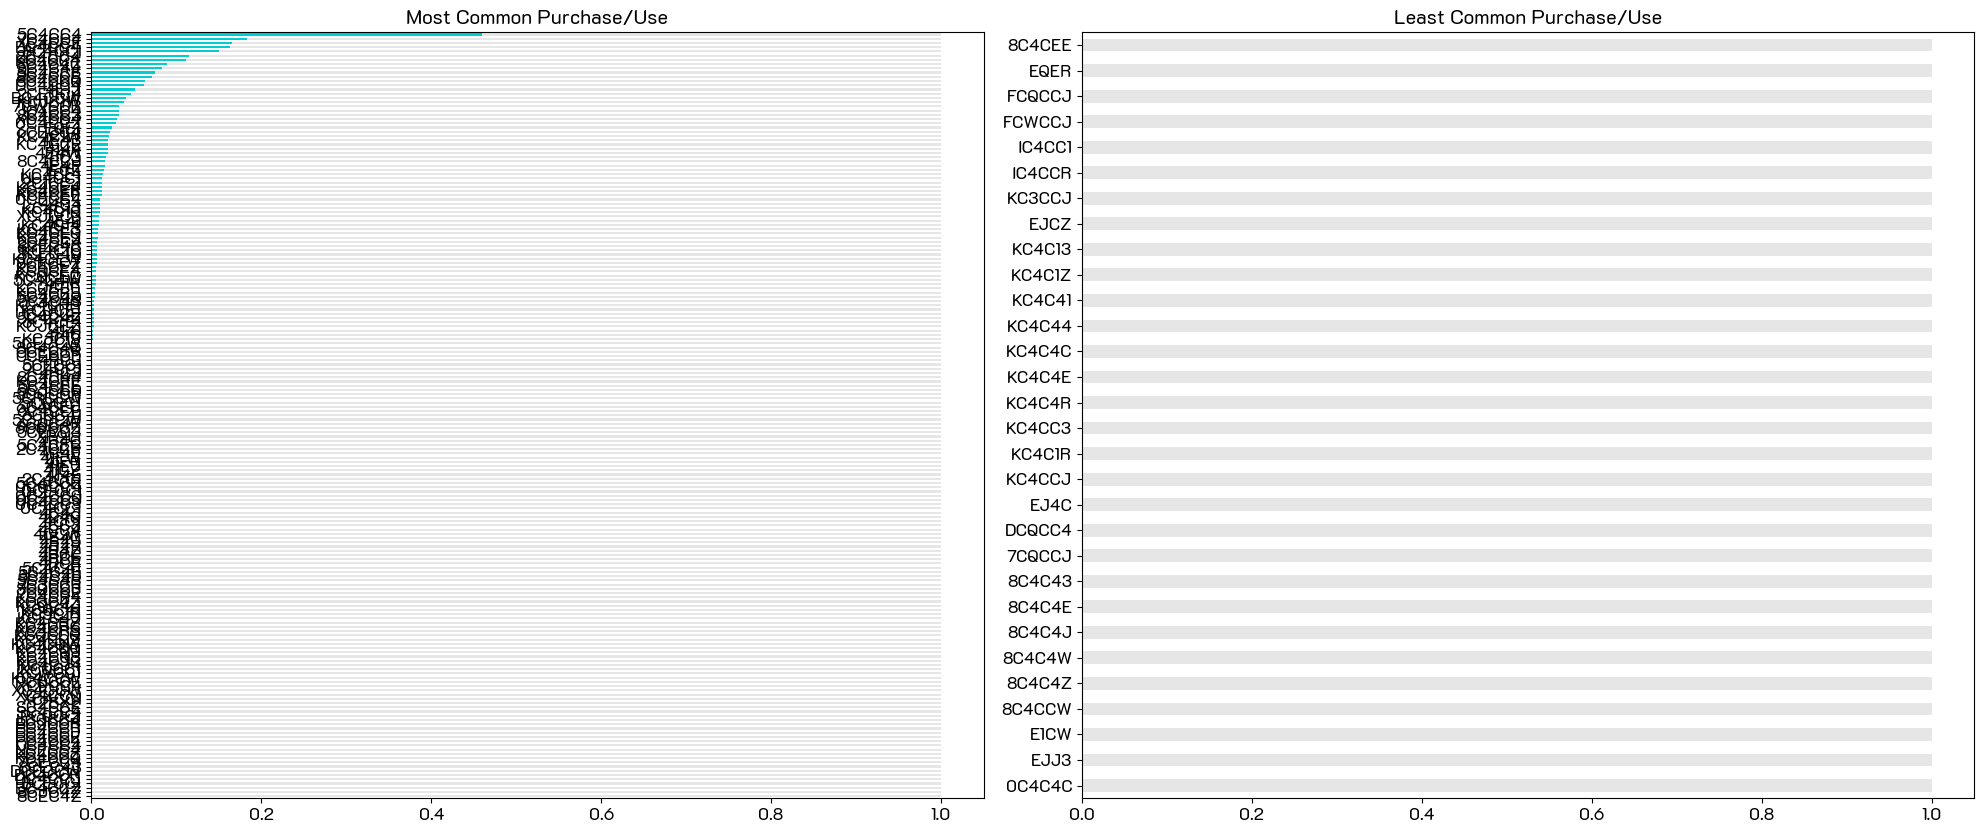

In [27]:
temp = prep2.mean().sort_values().to_frame().rename({0:'yes'}, axis=1)
temp['no'] = 1 - temp['yes']

fig, axes = plt.subplots(1,2, figsize=(20,8.5), tight_layout=True)
colors = ['darkturquoise','.9']
temp[30:].plot.barh(stacked=True, color=colors, ax=axes[0], title='Most Common Purchase/Use', legend=False)
temp[:30].sort_values('yes', ascending=False).plot.barh(stacked=True, color=colors, ax=axes[1], title='Least Common Purchase/Use', legend=False)
# plt.savefig('plots/usage.png',dpi=120)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


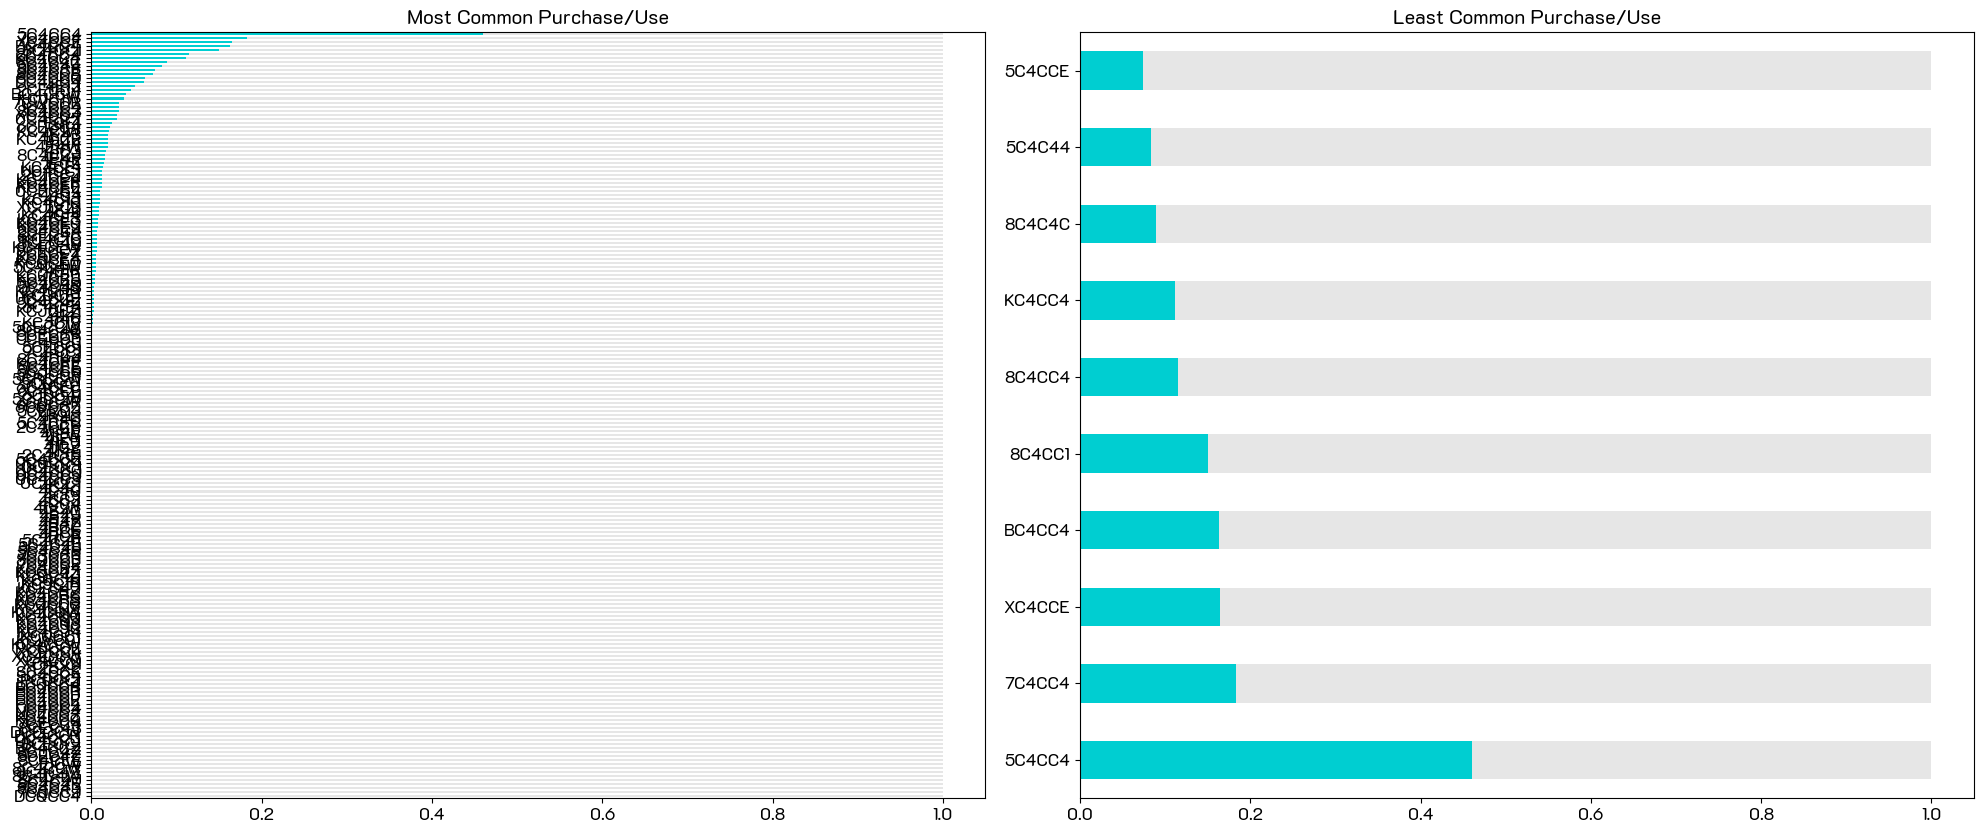

In [28]:
temp = prep2.mean().sort_values().to_frame().rename({0:'yes'}, axis=1)
temp['no'] = 1 - temp['yes']

fig, axes = plt.subplots(1,2, figsize=(20,8.5), tight_layout=True)
colors = ['darkturquoise','.9']

temp[20:].plot.barh(stacked=True, color=colors, ax=axes[0], title='Most Common Purchase/Use', legend=False)
temp[-10:].sort_values('yes', ascending=False).plot.barh(stacked=True, color=colors, ax=axes[1], title='Least Common Purchase/Use', legend=False)
# plt.savefig('plots/usage.png',dpi=120)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


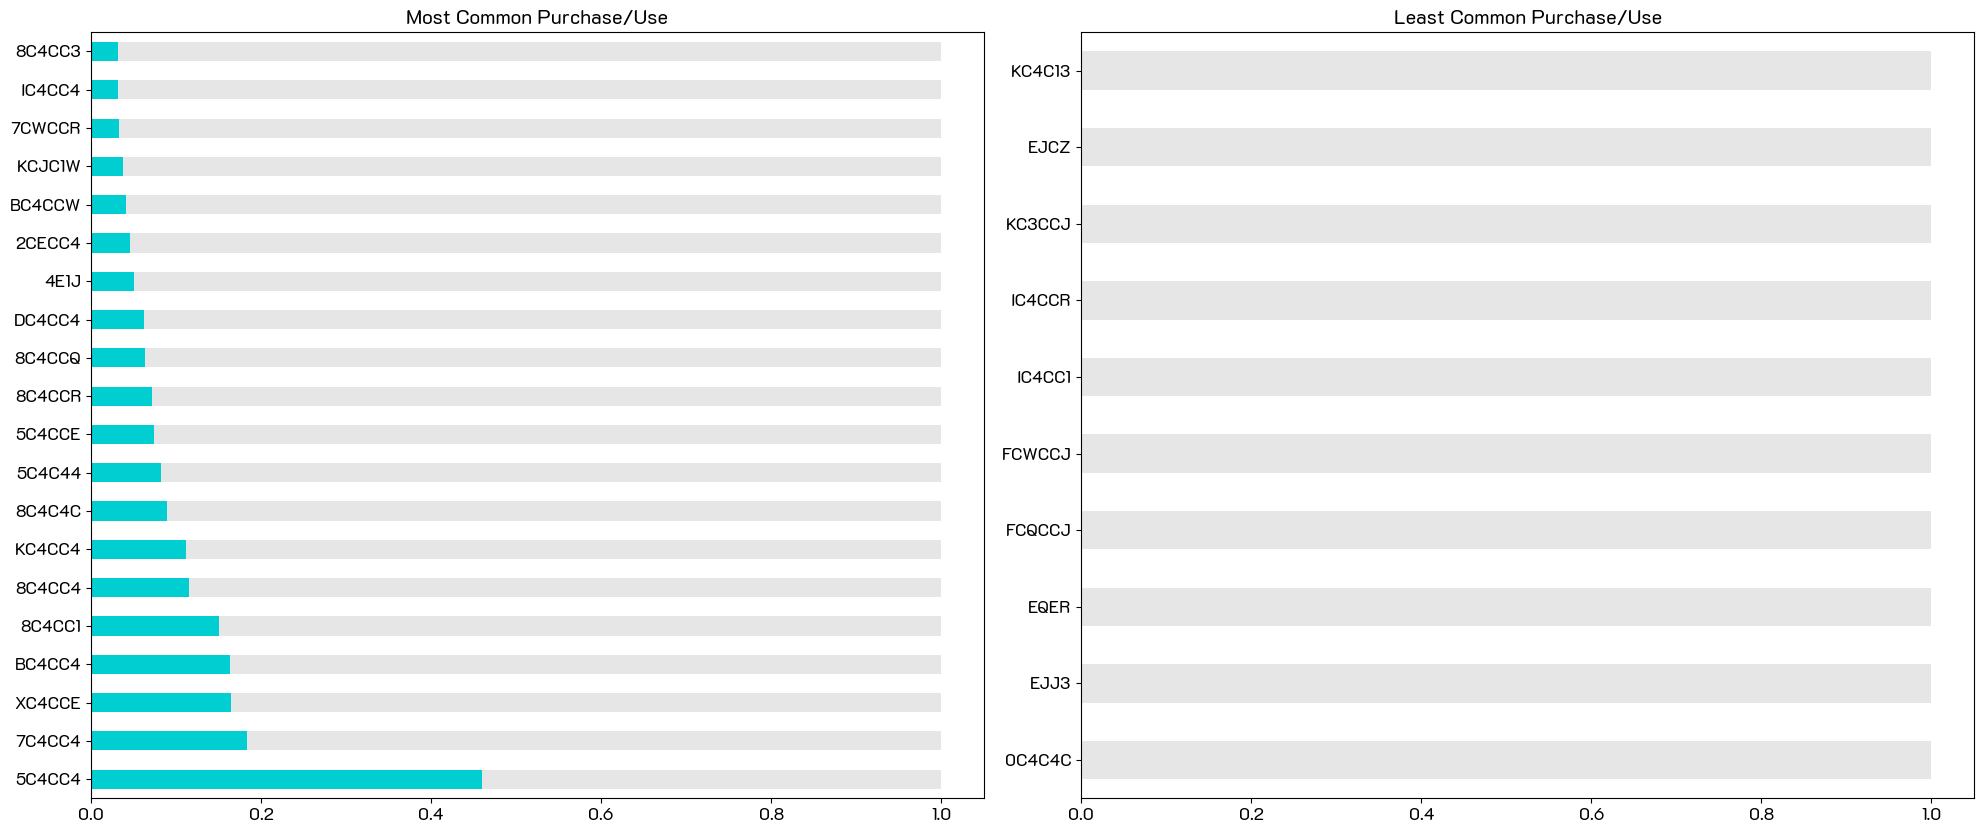

In [29]:
temp = prep2.mean().sort_values().to_frame().rename({0:'yes'}, axis=1)
temp['no'] = 1 - temp['yes']

fig, axes = plt.subplots(1,2, figsize=(20,8.5), tight_layout=True)
colors = ['darkturquoise','.9']

temp[-20:].sort_values('yes', ascending=False).plot.barh(stacked=True, color=colors, ax=axes[0], title='Most Common Purchase/Use', legend=False)
temp[:10].sort_values('yes', ascending=False).plot.barh(stacked=True, color=colors, ax=axes[1], title='Least Common Purchase/Use', legend=False)
# plt.savefig('plots/usage.png',dpi=120)
plt.show()

Item Count per User

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


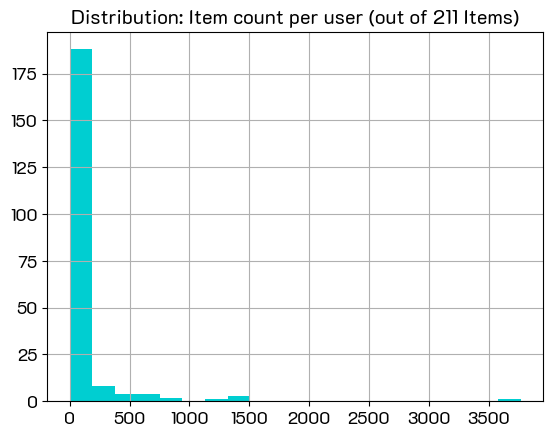

In [30]:
prep2.sum().hist(bins=20, color='darkturquoise')
plt.title('Distribution: Item count per user (out of 211 Items)')
plt.show()

Market Basket Analysis

Frequent Itemsets & Association Rules

In [35]:
# prepare dataframe prep2 by drop NaN
prep2.dropna(inplace=True)
# calculate frequent itemsets
frequent_itemsets = apriori(prep2, min_support=0.1, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(8, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.460129,(5C4CC4)
1,0.182928,(7C4CC4)
2,0.150079,(8C4CC1)
3,0.114788,(8C4CC4)
4,0.163268,(BC4CC4)


In [36]:
# generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(2, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(5C4CC4),(8C4CC1),0.460129,0.150079,0.104408,0.226911,1.511939,0.035352,1.099382,0.627183
1,(8C4CC1),(5C4CC4),0.150079,0.460129,0.104408,0.695688,1.511939,0.035352,1.774067,0.398387


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


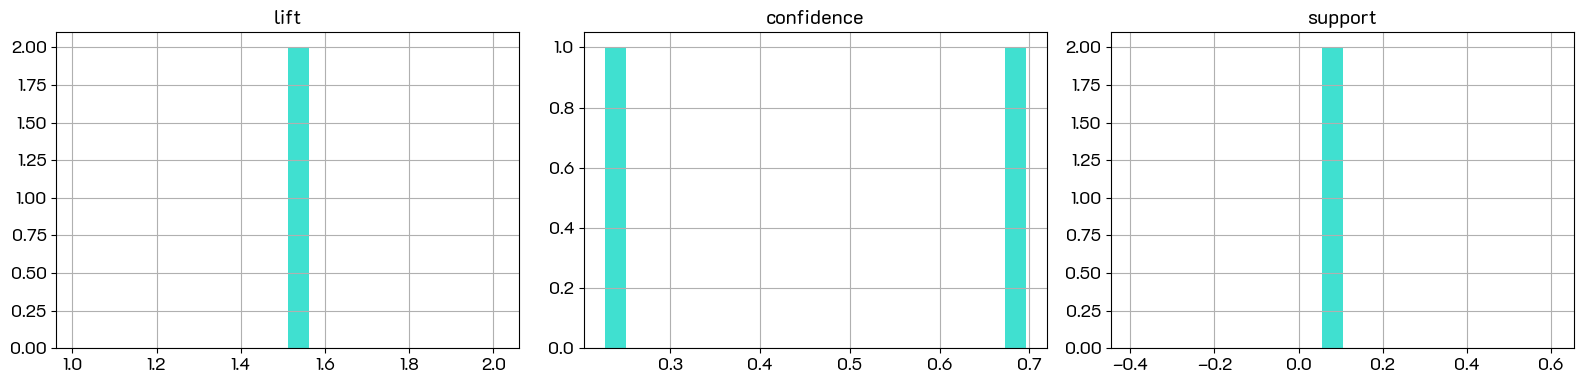

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='turquoise')
    ax.set_title(var)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


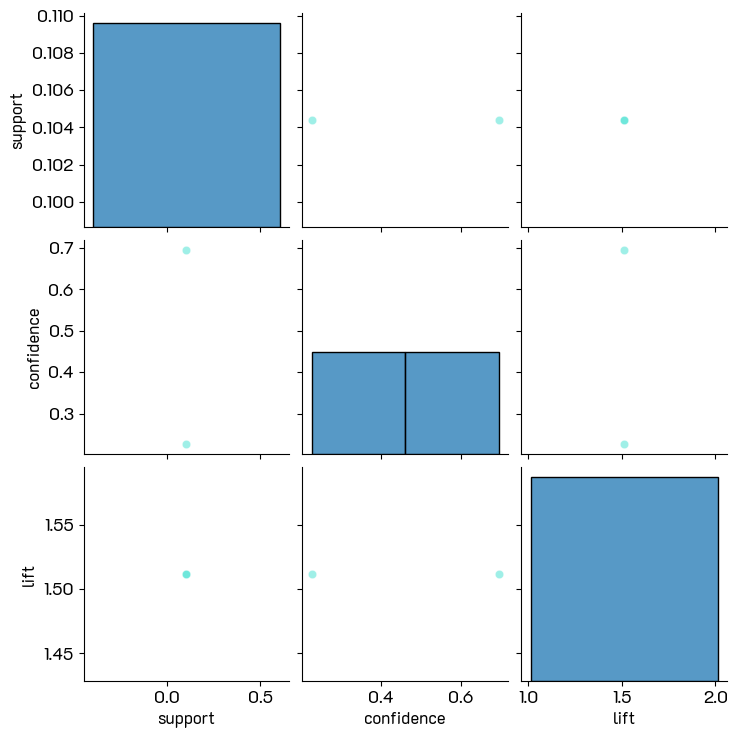

In [38]:
sns.pairplot(rules, vars=['support','confidence','lift'], plot_kws = {'color':'turquoise', 'alpha':.5});

Visualize Rules of 1-Itemsets

Both cardinalities of antecedent and consequent sets = 1

In [39]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.4)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)

(1, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(8C4CC1),(5C4CC4),0.150079,0.460129,0.104408,0.695688,1.511939,0.035352,1.774067,0.398387


In [40]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-4f0327f194a2>:5: RuntimeWarning: invalid value encountered in divide
  width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8


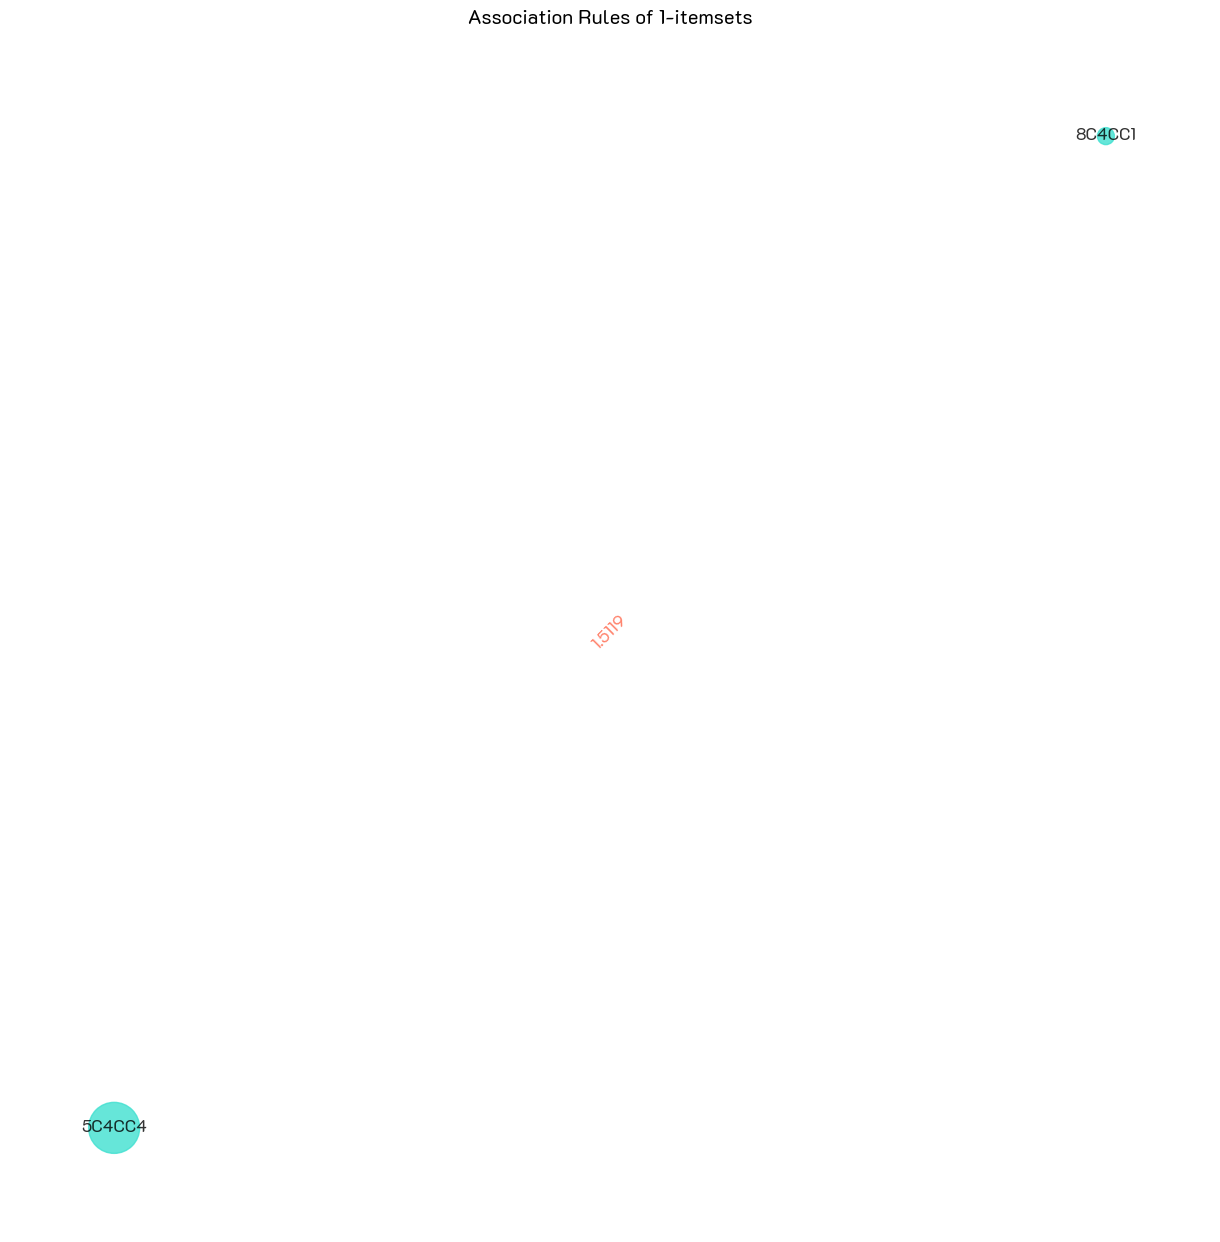

In [41]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20,
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='turquoise',
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()